Published on July 19, 2025. By Prata, Marília (mpwolke)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Two lines Required to Plot Plotly
import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly.graph_objects as go
import plotly.express as px


import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/remote-worker-productivity/remote_work_productivity.csv


![](https://cdn.shopify.com/s/files/1/0681/0458/5522/files/WFH_SimpsonsKeyboardPecker_480x480.gif?v=1669423547)Caps N Lock

## About Dataset

**Author: NPrak (NPrakash)**

Primary Research Focus: Age vs Productivity correlation, Years of Experience impact on remote work effectiveness, WFH Days per Week optimal balance analysis, Multiple productivity metrics (not just one score).

**Dataset Highlights:**

1,500 rows - Perfect size for analysis

30+ columns - Rich feature set

Realistic correlations - Built-in meaningful relationships

Clean data - No missing values, proper data types

Multiple target variables - 5 different productivity metrics


**Built-in Research Insights:**

Age sweet spot around 30-45 for productivity
Experience curve - diminishing returns after 15+ years
Department differences - Tech roles benefit more from WFH
WFH optimization - 2-3 days often optimal for most roles
Environment factors - Home office quality significantly impacts performance

https://www.kaggle.com/datasets/nprakash/remote-worker-productivity

In [3]:
df = pd.read_csv("/kaggle/input/remote-worker-productivity/remote_work_productivity.csv")
df.head()

,Employee_ID,Age,Years_Experience,WFH_Days_Per_Week,Gender,Education_Level,Marital_Status,Has_Children,Location_Type,Department,...,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance,Survey_Date,Response_Quality
0,EMP0001,39,10,2,Female,Associate Degree,Married,Yes,Urban,Product,...,58.1,52.1,72.1,4,48,55.9,6,8,2024-04-05,Medium
1,EMP0002,33,4,5,Female,Master Degree,Married,No,Urban,Customer Success,...,93.3,77.9,89.5,12,0,96.1,3,8,2024-01-29,High
2,EMP0003,40,3,3,Male,PhD,Single,Yes,Rural,Operations,...,84.7,63.2,95.0,15,24,90.4,5,6,2024-01-18,High
3,EMP0004,48,14,3,Male,Bachelor Degree,Married,Yes,Urban,Finance,...,67.8,82.5,95.0,8,8,100.0,10,5,2024-04-18,High
4,EMP0005,32,6,5,Male,High School,Divorced,Yes,Rural,Engineering,...,86.4,67.5,95.0,10,0,100.0,3,4,2024-02-19,High


## info() method

No missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee_ID                   1500 non-null   object 
 1   Age                           1500 non-null   int64  
 2   Years_Experience              1500 non-null   int64  
 3   WFH_Days_Per_Week             1500 non-null   int64  
 4   Gender                        1500 non-null   object 
 5   Education_Level               1500 non-null   object 
 6   Marital_Status                1500 non-null   object 
 7   Has_Children                  1500 non-null   object 
 8   Location_Type                 1500 non-null   object 
 9   Department                    1500 non-null   object 
 10  Job_Level                     1500 non-null   object 
 11  Company_Size                  1500 non-null   object 
 12  Industry                      1500 non-null   object 
 13  Hom

## describe() method

In [8]:
df.describe().loc[['mean','min','max']].T

,mean,min,max
Age,35.190667,22.0,65.0
Years_Experience,4.594667,0.0,32.0
WFH_Days_Per_Week,2.857333,0.0,5.0
Work_Hours_Per_Week,41.734000,25.0,65.0
Productivity_Score,83.094867,35.0,98.0
Task_Completion_Rate,82.507133,40.0,100.0
Quality_Score,84.410933,50.0,100.0
Innovation_Score,72.821667,30.0,95.0
Efficiency_Rating,90.488533,43.4,95.0
Meetings_Per_Week,8.080000,1.0,19.0


In [7]:
#Numerical List
#only Integer: list(df.select_dtypes(include='int64').columns)
#Below could be df.select_dtypes(include=[np.number])

list(df.select_dtypes(include=['int64', 'float64']).columns)

['Age',
 'Years_Experience',
 'WFH_Days_Per_Week',
 'Work_Hours_Per_Week',
 'Productivity_Score',
 'Task_Completion_Rate',
 'Quality_Score',
 'Innovation_Score',
 'Efficiency_Rating',
 'Meetings_Per_Week',
 'Commute_Time_Minutes',
 'Job_Satisfaction',
 'Stress_Level',
 'Work_Life_Balance']

## Correlation Heatmap

Firstly, pick the numerical columns.

In [10]:
numerical_cols = ['Age',
 'Years_Experience',
 'WFH_Days_Per_Week',
 'Work_Hours_Per_Week',
 'Productivity_Score',
 'Task_Completion_Rate',
 'Quality_Score',
 'Innovation_Score',
 'Efficiency_Rating',
 'Meetings_Per_Week',
 'Commute_Time_Minutes',
 'Job_Satisfaction',
 'Stress_Level',
 'Work_Life_Balance']

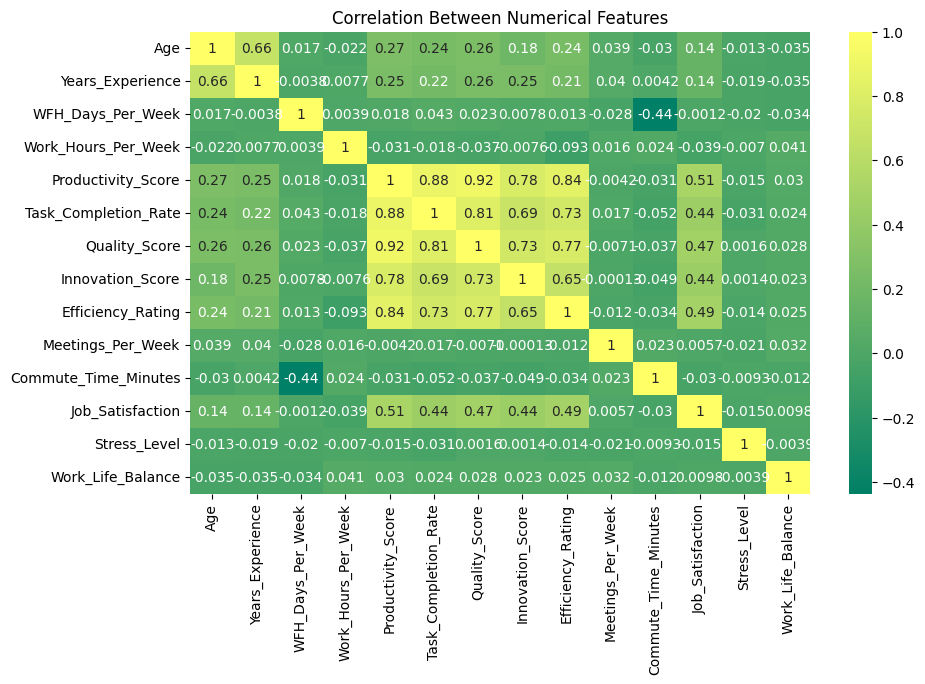

In [11]:
# OutlierPandas https://www.kaggle.com/code/abhyudaya456/s5e6-eda-for-predicting-optimal-fertilizers/notebook 
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='summer')
plt.title("Correlation Between Numerical Features")
plt.show()

## Histograms

It seems that the score features (2nd row) are left skewed.

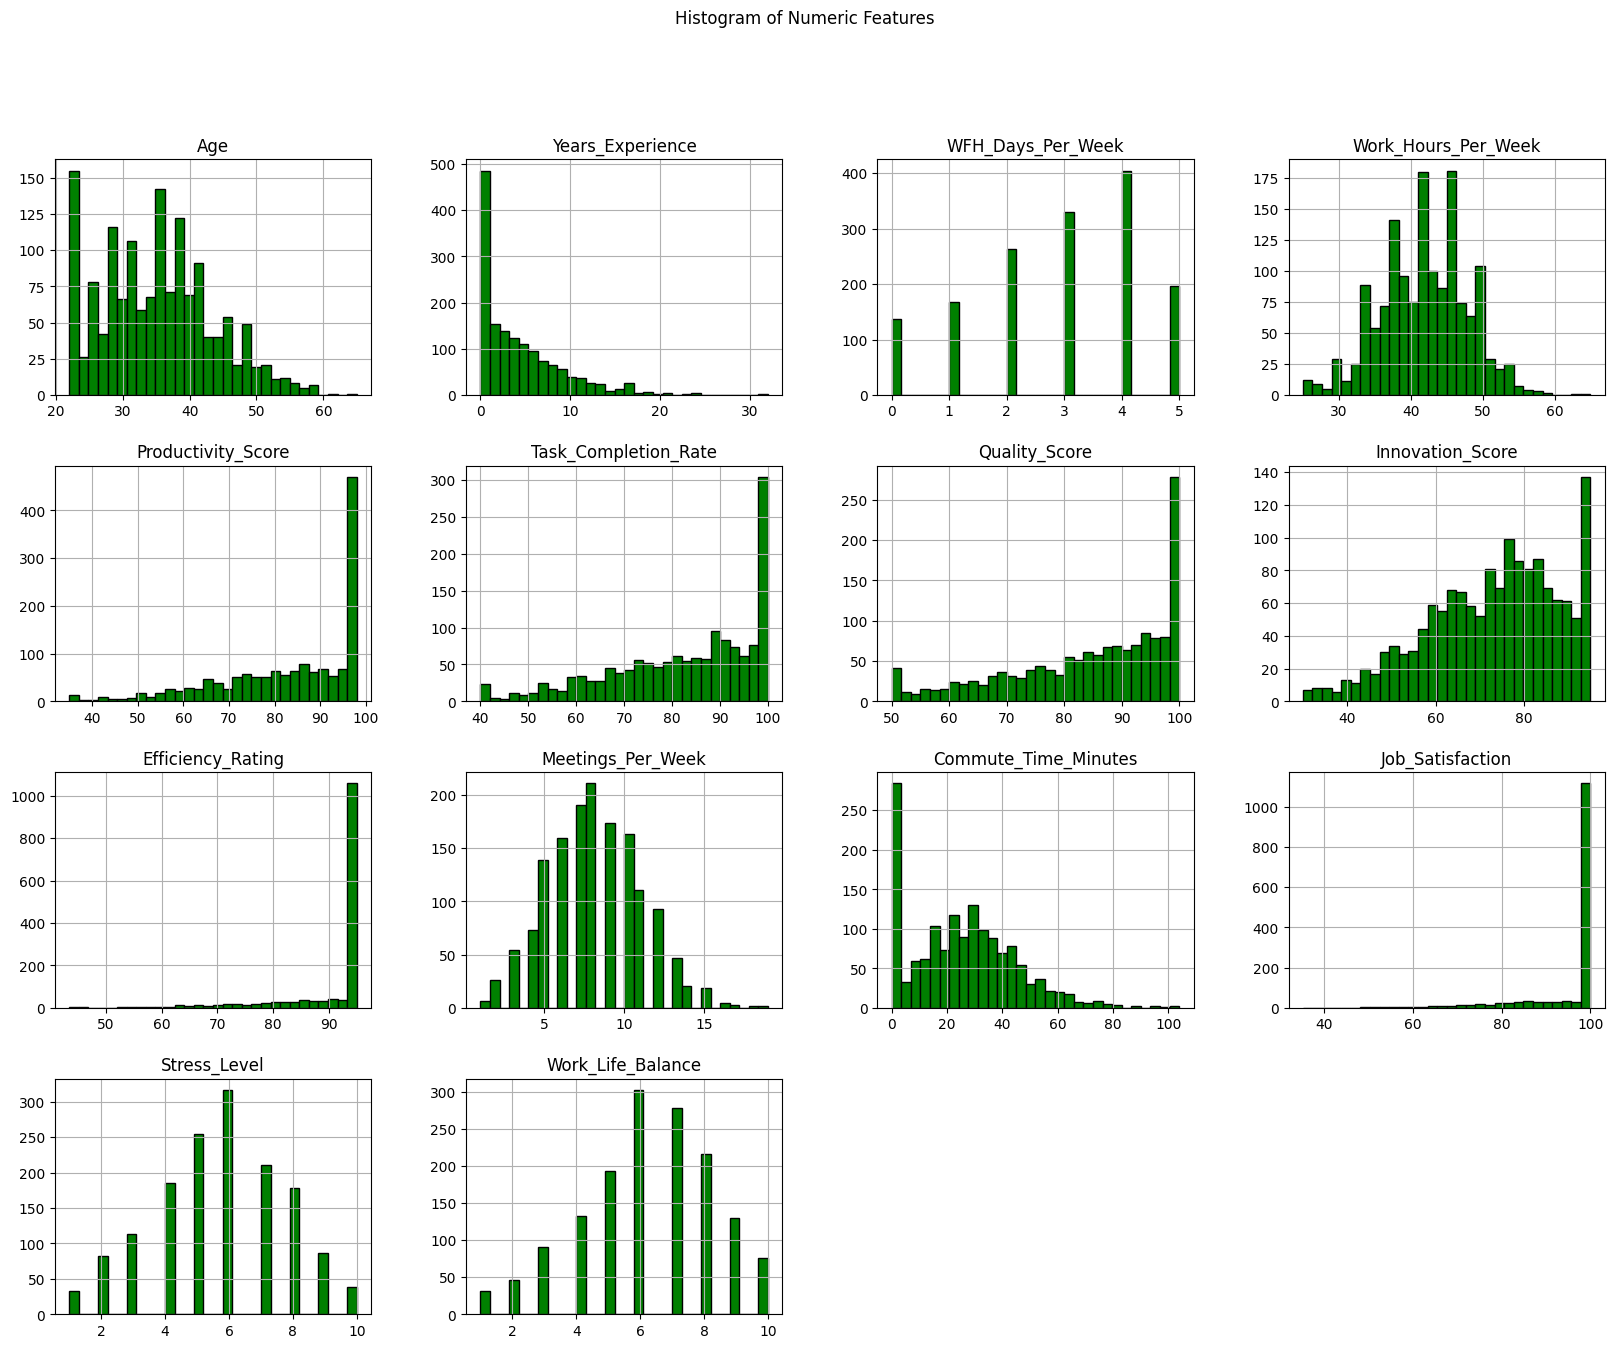

In [12]:
#Original figsize 15,10
df[numerical_cols].hist(figsize=(20,15), bins=30, color='Green', edgecolor='black')
plt.suptitle("Histogram of Numeric Features")
plt.show()

## Create sub-dataframe with numerical columns

In [14]:
# Create sub-dataframe with numerical columns
remote = df[numerical_cols]
remote.tail()

,Age,Years_Experience,WFH_Days_Per_Week,Work_Hours_Per_Week,Productivity_Score,Task_Completion_Rate,Quality_Score,Innovation_Score,Efficiency_Rating,Meetings_Per_Week,Commute_Time_Minutes,Job_Satisfaction,Stress_Level,Work_Life_Balance
1495,53,5,5,36,78.5,89.7,84.1,58.3,89.4,9,0,71.4,8,5
1496,53,9,3,43,74.7,71.9,74.7,54.2,87.2,3,11,95.8,8,8
1497,45,2,4,51,88.6,92.9,88.4,71.2,95.0,11,34,100.0,4,5
1498,44,12,4,26,92.1,74.2,93.9,88.6,95.0,10,6,100.0,3,6
1499,40,4,5,40,71.4,64.1,64.8,64.9,81.0,12,0,100.0,5,7


## corrwith() method

Pandas correlation one column vs all: Use corrwith() method

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html

In [15]:
#https://stackoverflow.com/questions/70479605/python-pandas-pandas-correlation-one-column-vs-all
#pandas correlation one column vs all
#it's in aplhabetical order

remote.corrwith(remote['Productivity_Score'])

Age                     0.265518
Years_Experience        0.253481
WFH_Days_Per_Week       0.018172
Work_Hours_Per_Week    -0.030801
Productivity_Score      1.000000
Task_Completion_Rate    0.884187
Quality_Score           0.917980
Innovation_Score        0.782948
Efficiency_Rating       0.838087
Meetings_Per_Week      -0.004250
Commute_Time_Minutes   -0.031447
Job_Satisfaction        0.513332
Stress_Level           -0.015355
Work_Life_Balance       0.029674
dtype: float64

## Linear relationships: Productivity score and the numerical columns

Quantify the linear relationships between the Productivity_Score and the numerical columns by analysing their correlation with each other.

Pandas correlation one column vs all: Use **corrwith()** method

Use corrwith() method to quantify the correlation between (single) column Productivity_Score and the rest of the "remote" columns (numerical columns of the dataframe)

In [16]:
#Apply corrwith() method to get the relationship of one single column and ALL the others
#apply sort_values() to get the most (higher values) and least correlated
#We got a Pandas Series sorted from higher correlation to lower 

productivity= remote.corrwith(remote['Productivity_Score']).sort_values(ascending=False) 

productivity

Productivity_Score      1.000000
Quality_Score           0.917980
Task_Completion_Rate    0.884187
Efficiency_Rating       0.838087
Innovation_Score        0.782948
Job_Satisfaction        0.513332
Age                     0.265518
Years_Experience        0.253481
Work_Life_Balance       0.029674
WFH_Days_Per_Week       0.018172
Meetings_Per_Week      -0.004250
Stress_Level           -0.015355
Work_Hours_Per_Week    -0.030801
Commute_Time_Minutes   -0.031447
dtype: float64

### Observations:

3 **Least Correlated (absolute values)**: Meetings_Per_Week, Stress_Level, and WFH_Days_Per_Week.

3 **Most Correlated**: Productivity_Score , Quality_Score, Task_Completion_Rate and Efficiency_Rating.

**Negative relationship:**

Commute_Time_Minutes  -0.031447

Work_Hours_Per_Week   -0.030801

Stress_Level -0.015355

**Positive relationship:**

Productivity_Score 1.000000

Quality_Score    0.917980

Task_Completion_Rate  0.884187

Efficiency_Rating  0.838087

## Most and Least Correlated with Productivity score

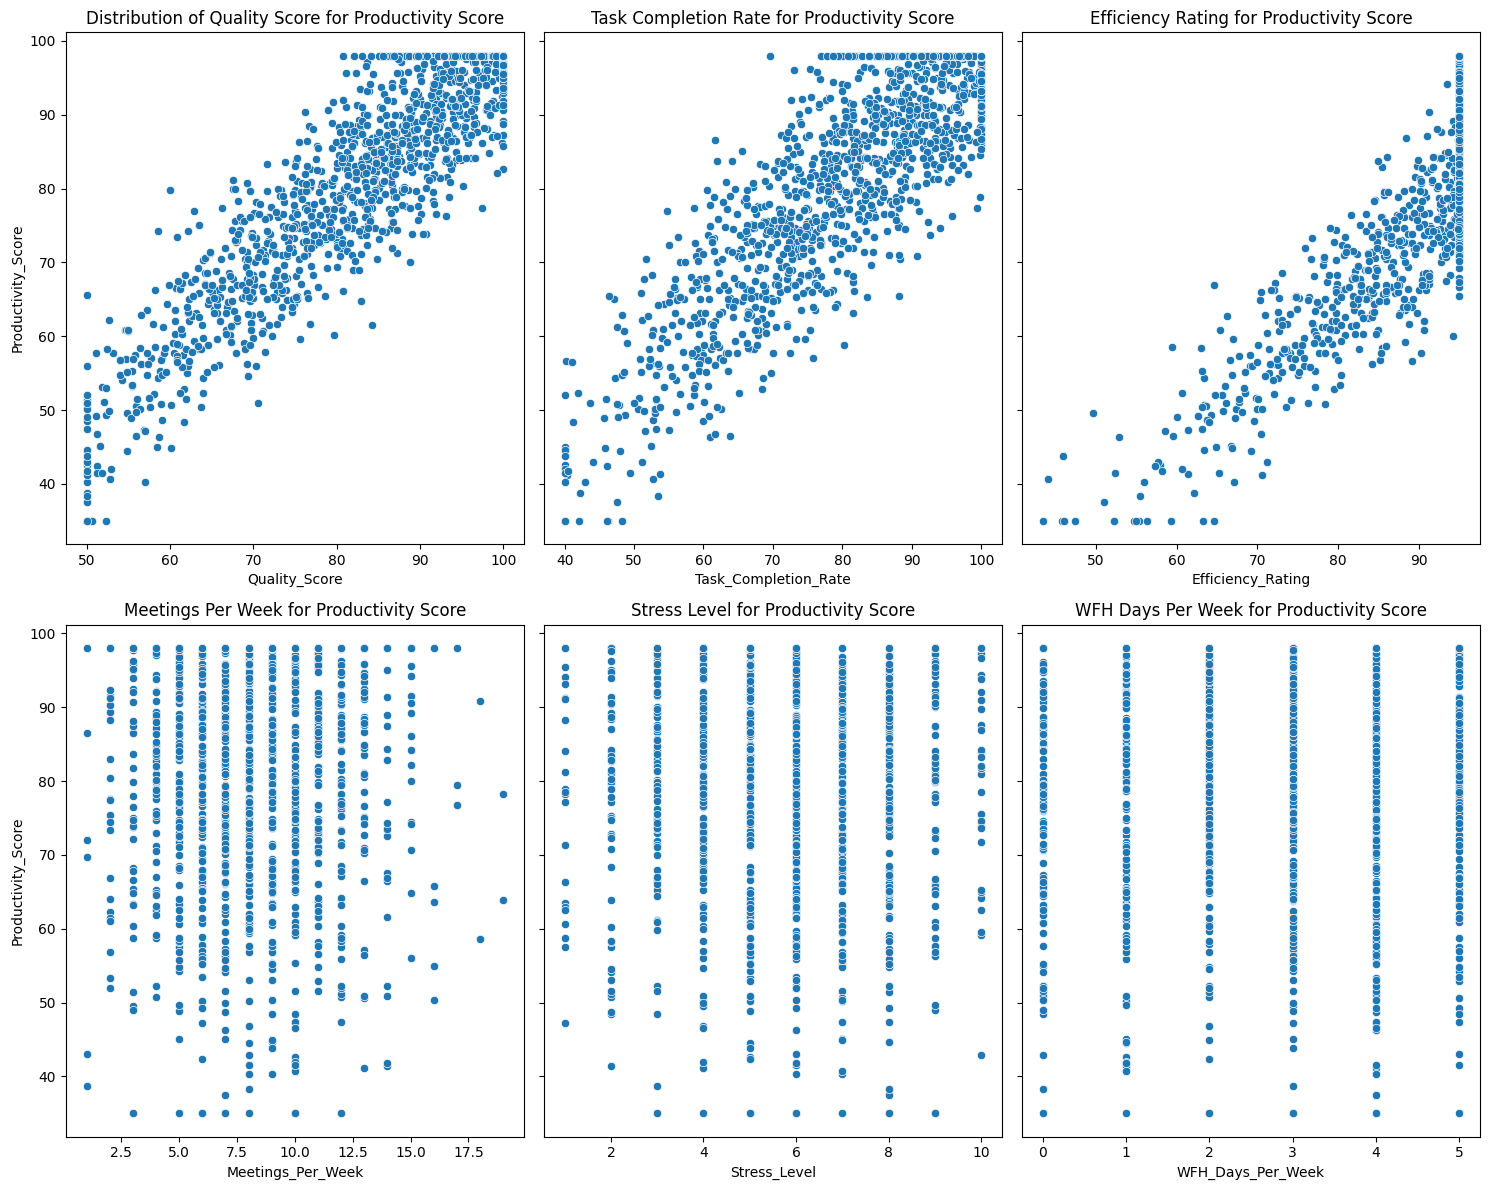

In [17]:
fig, axes = plt.subplots(nrows = 2,
                         ncols = 3,
                         figsize = (15, 12), sharey=True) 


sns.scatterplot(x="Quality_Score", y="Productivity_Score", data=remote, ax=axes[0][0])
sns.scatterplot(x="Task_Completion_Rate", y="Productivity_Score", data=remote, ax=axes[0][1])
sns.scatterplot(x="Efficiency_Rating", y="Productivity_Score", data=remote, ax=axes[0][2])
sns.scatterplot(x="Meetings_Per_Week", y="Productivity_Score", data=remote, ax=axes[1][0])
sns.scatterplot(x="Stress_Level", y="Productivity_Score", data=remote, ax=axes[1][1])
sns.scatterplot(x="WFH_Days_Per_Week", y="Productivity_Score", data=remote, ax=axes[1][2])


#Distributions of the Most (1st row) and the Least Correlated 
#Correlated to Productivity_Score

axes[0][0].set_title('Distribution of Quality Score for Productivity Score')
axes[0][1].set_title('Task Completion Rate for Productivity Score')
axes[0][2].set_title('Efficiency Rating for Productivity Score')
axes[1][0].set_title('Meetings Per Week for Productivity Score')
axes[1][1].set_title('Stress Level for Productivity Score')
axes[1][2].set_title('WFH Days Per Week for Productivity Score')

fig.tight_layout()

### Observations of Visual relationships

On the Most Correlated (1st row) the points follow a direction going from near the origin out to high y-values, the variables are said to have a positive correlation. Besides, the concentration of dots/points is high.

I didn't removed the outliers : (

On that second row (least correlated variables), the features don't show any relationship with Productivity score. Despite their increase, Productivity score remains unaffected. And the fastidious Outliers are still there. 

## Divide the dataset (into equal parts)

These values cause they divide the dataset into equal parts. The values will be sorted in an increasing order.) Values returned by the describe method.

In [20]:
df['Productivity_Score'].describe().loc[['min', '25%','50%','75%','max']]

min    35.0
25%    73.7
50%    86.7
75%    98.0
max    98.0
Name: Productivity_Score, dtype: float64

## pd.cut

I used **pd.cut** along the columns of the dataframe starting from 35.0 (min describe above), specifying the bins that I wanted to use.

It supports binning into an equal number of bins, or a pre-specified array of bins. Like what I chose after the describe method above.

I changed the max to 1644 (75%). Bins are respectively: 35 (min), 74 (25%), 87 (50%), 98 (75%). I have rounded 73.7 and 86.7 .

Another option, could be use pd.qcut with q = [0, 0.25, 0.75, 1.0] That would combine quantile and cut methods.

[pandas.cut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)

[pandas.qcut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html)

## Create a new variable

That variable will hold equal proportion in the 3 categories low, medium and high Productivity score.

In [22]:
from statistics import mean 

#'float' object cannot be interpreted as an integer. So round the values above.

#https://stackoverflow.com/questions/54369807/how-can-i-categorize-all-columns-in-a-data-at-once-make-all-values-become-high

#Bin labels must be one fewer than the number of bin edges
df['new']=pd.cut(df['Productivity_Score'], bins= [35, 74, 87, 98], labels=['low', 'medium', 'high'])#Original used qcut (quantiles)

In [23]:
#How many entries for low, medium and high do we have:

df['new'].value_counts()

new
high      735
medium    379
low       373
Name: count, dtype: int64

In [24]:
#New variable holds proportion of values in three categories low productivity, medium productivity and high productivity
#The values medium/high/low were got on the snippet above : df['new'].value_counts() 

pd.DataFrame(["high"] * 735 + ["medium"] * 379 + ["low"] * 373, columns=['new'])

,new
0,high
1,high
2,high
3,high
4,high
...,...
1482,low
1483,low
1484,low
1485,low


## Let's work with object features

In [25]:
list(df.select_dtypes(include='object').columns)

['Employee_ID',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Has_Children',
 'Location_Type',
 'Department',
 'Job_Level',
 'Company_Size',
 'Industry',
 'Home_Office_Quality',
 'Internet_Speed_Category',
 'Manager_Support_Level',
 'Team_Collaboration_Frequency',
 'Survey_Date',
 'Response_Quality']

## Response quality (Home Office and Internet Speed)

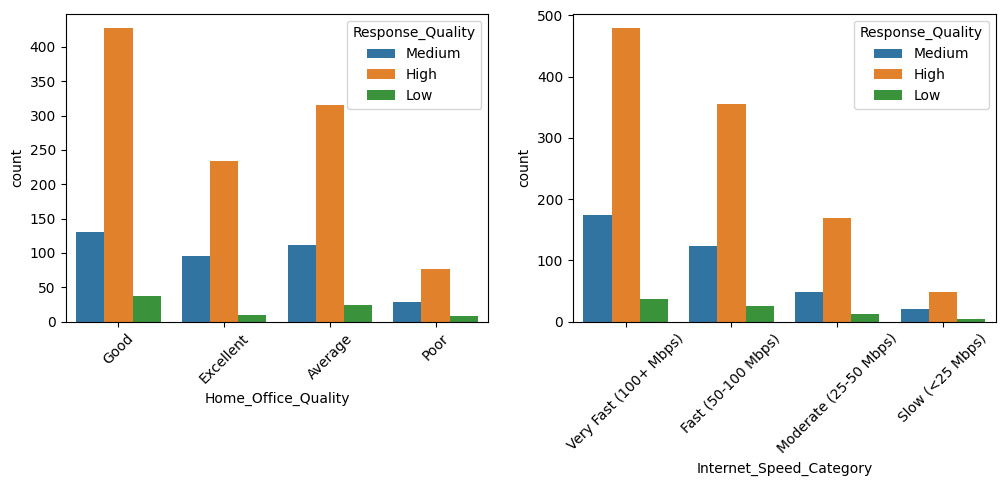

In [35]:
#https://stackoverflow.com/questions/52273546/matplotlib-typeerror-axessubplot-object-is-not-subscriptable
#https://stackoverflow.com/questions/76543569/rotation-of-xticks-in-seaborn-subplots

import matplotlib.pyplot as plt
import seaborn as sns

fig , axarr = plt.subplots(nrows=1, ncols=2,squeeze=False, figsize = (12,4))

sns.countplot(data=df, x="Home_Office_Quality", ax= axarr[0][0], hue='Response_Quality')
ax= axarr[0][0].tick_params("x",labelrotation=45)


sns.countplot(data=df, x="Internet_Speed_Category",ax=axarr[0][1], hue='Response_Quality')
ax= axarr[0][1].tick_params("x",labelrotation=45)

plt.show()

## Bivariate analysis

Checking Years of Experience impact on remote work effectiveness. We have some outliers here.

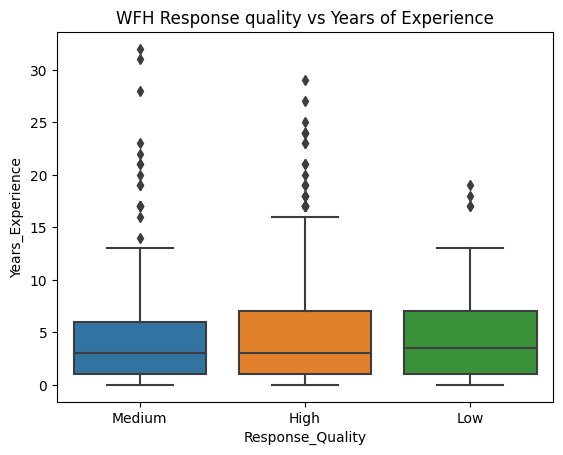

In [41]:
#https://www.kaggle.com/code/mpwolke/house-price-s/edit
# Response Quality vs Years of Experience
sns.boxplot(x=df['Response_Quality'], y=df['Years_Experience'])
plt.title('WFH Response quality vs Years of Experience');

### Age aspect on WFH

It seems the values are between 30 and 40 years. 

## With some OUTLIERS over 60 with High/Medium Quality. Imaginably myself.

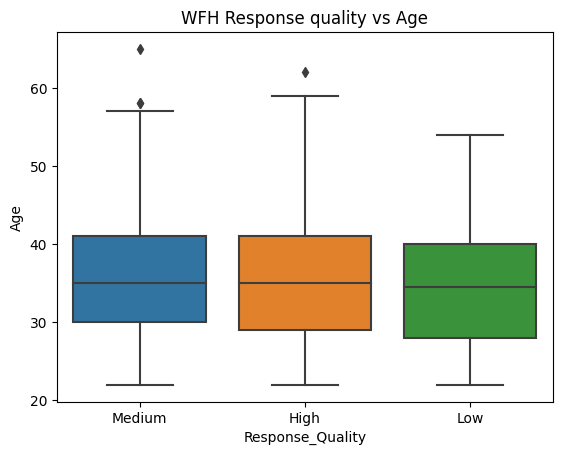

In [42]:
#https://www.kaggle.com/code/mpwolke/house-price-s/edit
# Response Quality vs Years of Experience
sns.boxplot(x=df['Response_Quality'], y=df['Age'])
plt.title('WFH Response quality vs Age');

### WFH (Work from Home) Days per Week optimal balance analysis

Outliers only on Years of Experience as seen above.

"The optimal number of **WFH (Work From Home)** days per week appears to be **two or three**. This **hybrid approach** balances the benefits of both in-office and remote work, leading to increased productivity, improved work-life balance, and higher employee retention." 

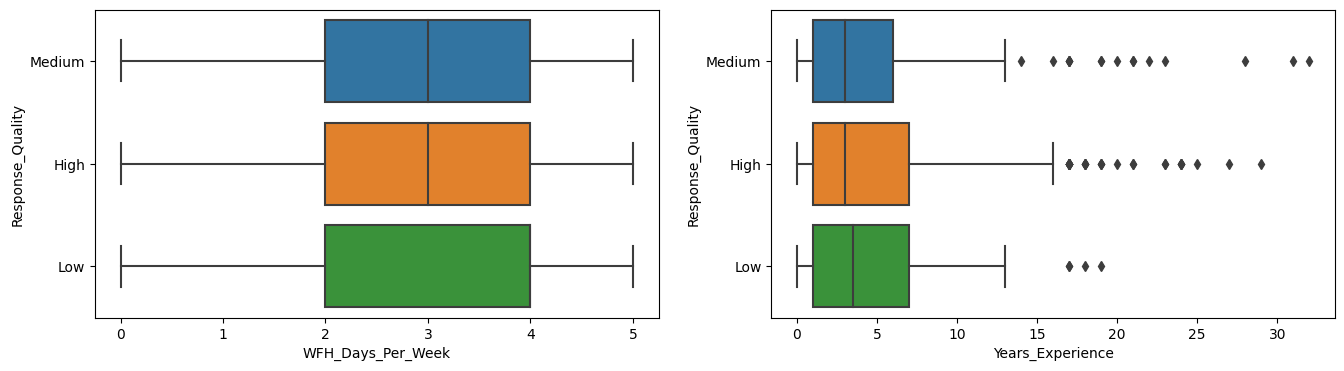

In [40]:
#https://www.kaggle.com/code/mpwolke/burning-calories-on-kaggle
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'WFH_Days_Per_Week', y = 'Response_Quality', data = df)
plt.subplot(122)
sns.boxplot(x = 'Years_Experience', y = 'Response_Quality', data = df)
plt.show()

## Education Level

In [45]:
df['Education_Level'].value_counts()

Education_Level
Bachelor Degree        673
Master Degree          489
Associate Degree       153
PhD                     88
High School             72
Professional Degree     25
Name: count, dtype: int64

#Groupby 'new' column with "Education Level' column.

In [46]:
df.groupby(['new','Education_Level']).size().reset_index(name='count')

,new,Education_Level,count
0,low,Associate Degree,43
1,low,Bachelor Degree,151
2,low,High School,19
3,low,Master Degree,133
4,low,PhD,21
5,low,Professional Degree,6
6,medium,Associate Degree,32
7,medium,Bachelor Degree,170
8,medium,High School,16
9,medium,Master Degree,130


## Contingency table  (Crosstab)

Check the data summarized in a (contingency) table.

In [47]:
#crosstab 

pd.crosstab(df.new, df.Education_Level, margins=True)

Education_Level,Associate Degree,Bachelor Degree,High School,Master Degree,PhD,Professional Degree,All
new,,,,,,,
low,43,151,19,133,21,6,373
medium,32,170,16,130,21,10,379
high,77,348,37,220,45,8,735
All,152,669,72,483,87,24,1487


## Test statistic and probability value.

In [49]:
#Use the chi2_contingency function to obtain the test statistic and probability value.

import scipy.stats as stats
import random

chi_square, p_value, df, matrix = stats.chi2_contingency(pd.crosstab(df.new, df.Education_Level))

print(chi_square,p_value)

11.765277277482703 0.3010727799041389


## p_value

p_value: 0.3010727799041389 

"Since the p-value is higher than the significance level of 0.05, we don't REJECT the null hypothesis. This indicates that the Education Level and the WFH Response quality proportions are Not Dependent from each other."

**I hope I haven't written any stupidity.**

## H0 was NOT Rejected

Outcome:

p-value (0.3010727799041389) of the whole data is higher than the significance level (0.05).

## Draft Session: 3h: 53m

#Acknowledgements:

OutlierPandas https://www.kaggle.com/code/abhyudaya456/s5e6-eda-for-predicting-optimal-fertilizers/notebook